# Задание 1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.special
import math

In [3]:
data_z1 = pd.read_csv("data/r2z1.csv")
data_z2 = pd.read_csv("data/r2z2.csv")
data_z2.head()

,X
0,0.525088
1,1.104669
2,2.226654
3,2.636846
4,2.425328


In [6]:
p0 = 0.2
alpha = 0.05
n = len(data_z1.index)

In [9]:
set_X = "A"
data_z1["indicator"] = data_z1["X"].apply(lambda x: 1 if x == set_X else 0)
M = sum(data_z1["indicator"])
M

15

In [11]:
def Fbin(x, n, p):
    y = 0
    for k in range(math.floor(x)+1):
        y += scipy.special.comb(n, k)*(p**k)*(1-p)**(n-k)
    return y

In [12]:
potential_crit_C = np.arange(0, 100, 1)
C_crit_const = [C for C in potential_crit_C if Fbin(C, n, p0) <= alpha ]
C_crit = np.max(C_crit_const)
C_crit

8

In [13]:
pvalue = Fbin(M, n, p0)
pvalue

0.6593302400391768

In [15]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(data_z1["indicator"], p0)

(-20.5, 1.0414019304757923e-06)

# Задание 2

In [16]:
def Fcolm(t):
    return 1 - 2*math.exp(-2*t*t)

In [17]:
def ExpDist(x):
    return 1 - math.exp(-0.5*x) if x>= 0 else 0

In [22]:
lambda_ = 0.5
alpha = 0.1

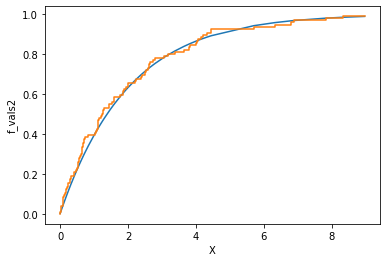

In [21]:
X_col = data_z2["X"]
X_col = sorted(X_col)
#Эмпирическая функция распределения
def f2(z):
    t = 0
    for i in X_col:
        if i < z:
            t += 1
    return t/len(X_col)
data_z2["f_vals2"] = data_z2["X"].apply(f2)
data_z2["f_vals3"] = data_z2["X"].apply(ExpDist)
sns.lineplot(data_z2["X"],data_z2["f_vals3"])
sns.lineplot(data_z2["X"],data_z2["f_vals2"], drawstyle='steps-pre')

In [25]:
from scipy.stats import kstest

loc = 0
scale =1/1.5
print(kstest(data_z2['X'], "expon", args=(0, (1/1.5))))
print('p < 0:01 — высоко значимое расхождение с гипотезой;')

KstestResult(statistic=0.3888581222187135, pvalue=1.3949288371330276e-13)
p < 0:01 — высоко значимое расхождение с гипотезой;


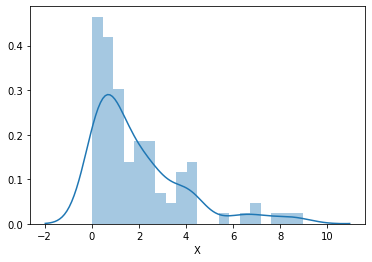

In [27]:
import scipy.stats as scp
x = sns.distplot(data_z2['X'],bins = 20, kde=True)

In [31]:
D, p_value = kstest(data_z2['X'], 'expon', args = (0, (1/1.5)))
print('\nKS-statistic D =', D, 'p-value = ', p_value)

quant = math.sqrt((-1/2*math.log(alpha/2, math.e)))
print('\nFkolm^(-1)(1 - alpha) = ',quant)

if math.sqrt(len(data_z2))*D > quant:
    print(math.sqrt(len(data_z2))*D, ' > ', quant)
    print('Н0 отклоняется')


KS-statistic D = 0.3888581222187135 p-value =  1.3949288371330276e-13

Fkolm^(-1)(1 - alpha) =  1.2238734153404083
3.8100159270906646  >  1.2238734153404083
Н0 отклоняется
